In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [16]:
def get_parsed_data():
    fname = "vsdata1.txt"
    df = pd.read_table(fname, sep=" ", skiprows=1, header=None)
    return df

In [17]:
data = get_parsed_data()
data = data.drop([50], axis=1)
data.columns = [str(s) for s in range(1, data.columns[-1]+1)] + ["stimulus"]

Explained variance: 
 0.07351556785777685


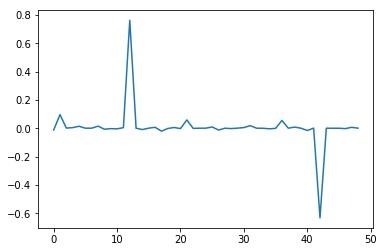

Explained variance: 
 0.0725017097497895


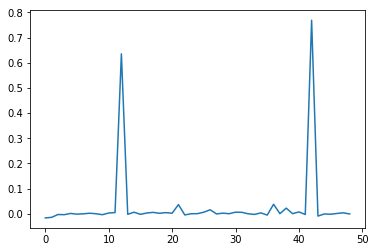

Explained variance: 
 0.06535881342400394


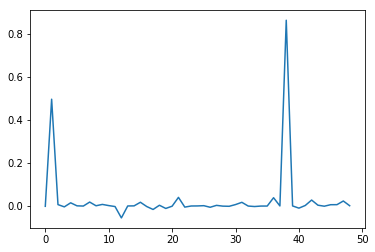

Explained variance: 
 0.06132726645393882


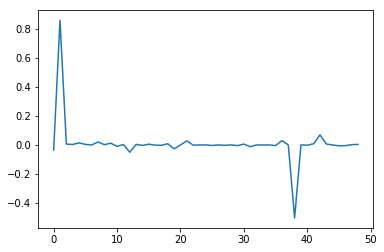

Explained variance: 
 0.05062388555829383


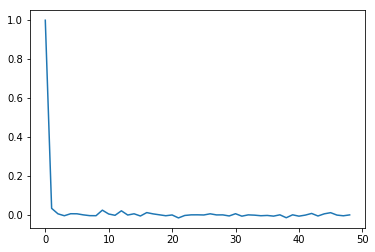

Explained variance: 
 0.04491111981515417


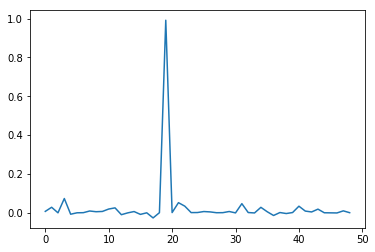

Explained variance: 
 0.04037686359054764


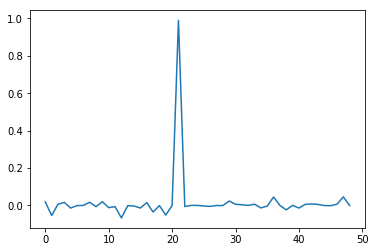

Explained variance: 
 0.03511266548773779


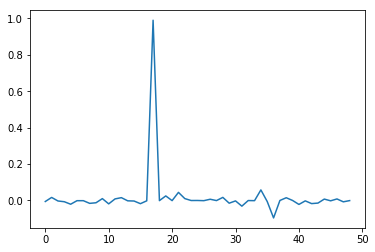

Explained variance: 
 0.03344791401999898


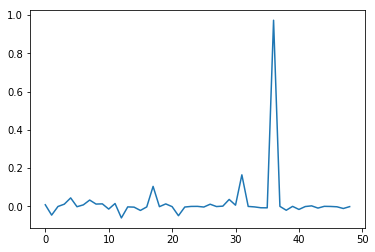

Explained variance: 
 0.027279836210114462


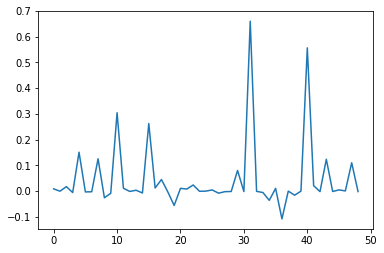

Explained variance: 
 0.02695496297914661


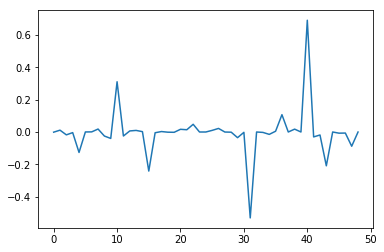

Explained variance: 
 0.02656951362882348


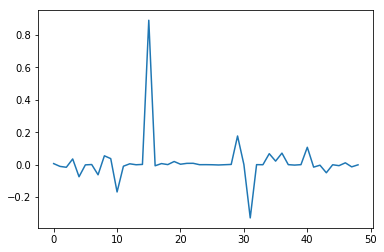

Explained variance: 
 0.02564685094862394


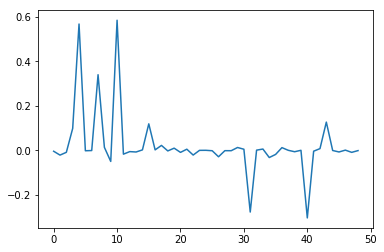

Explained variance: 
 0.025163881204833465


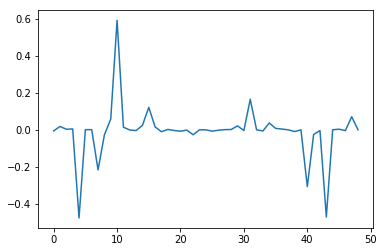

Explained variance: 
 0.024817994018713607


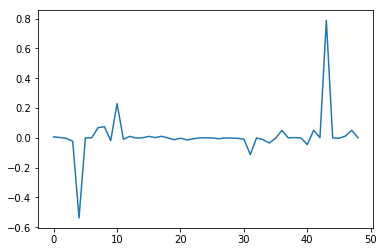

Explained variance: 
 0.02382803306065957


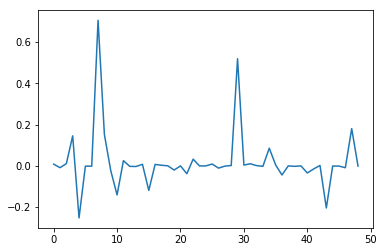

Explained variance: 
 0.023430729851385446


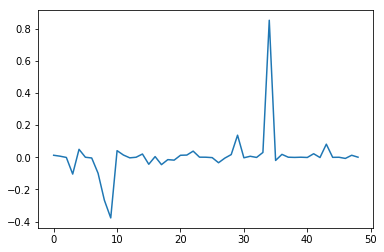

Explained variance: 
 0.02311258068344892


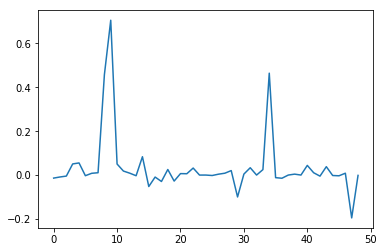

Explained variance: 
 0.022698265089080058


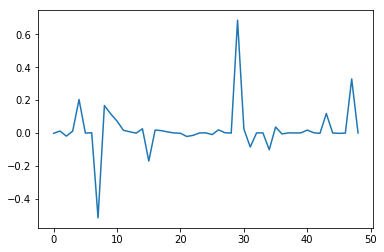

Explained variance: 
 0.022245715405919478


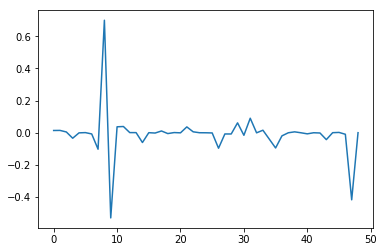

Explained variance: 
 0.02201034982663766


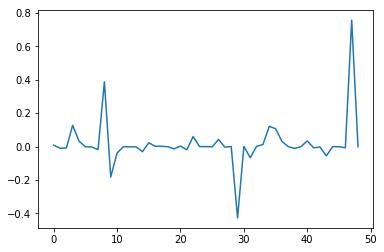

Explained variance: 
 0.021261023005066375


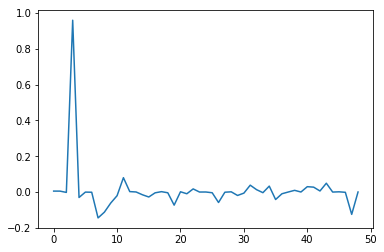

Explained variance: 
 0.01959703093623486


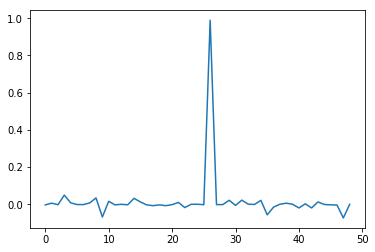

Explained variance: 
 0.017200542517357552


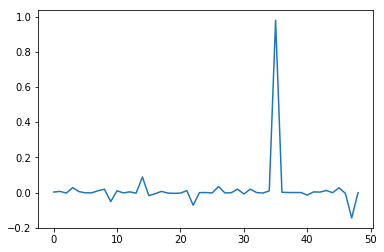

Explained variance: 
 0.015981323558897434


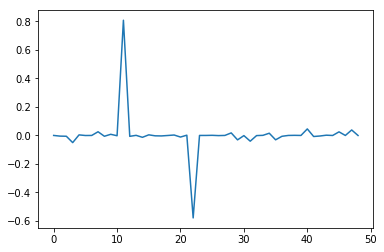

Explained variance: 
 0.01580797260859541


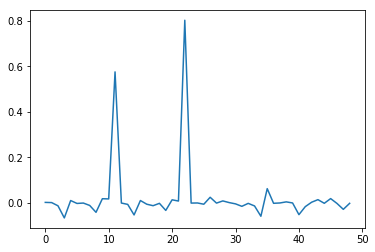

Explained variance: 
 0.01482352416107084


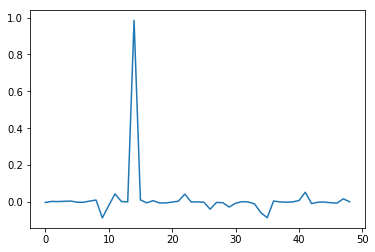

Explained variance: 
 0.011740531063754113


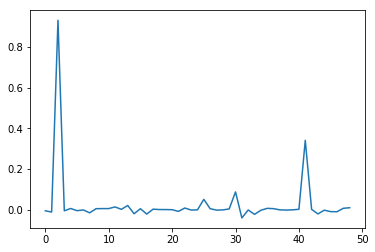

Explained variance: 
 0.010480840740186239


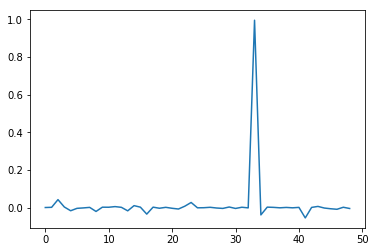

Explained variance: 
 0.010265584846798386


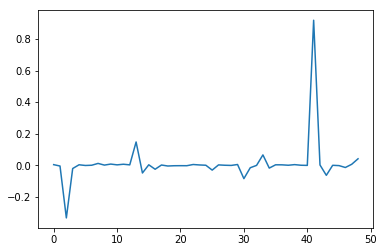

Explained variance: 
 0.00994900602465139


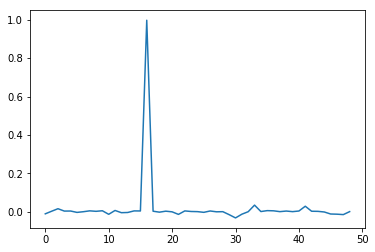

Explained variance: 
 0.009155225583184658


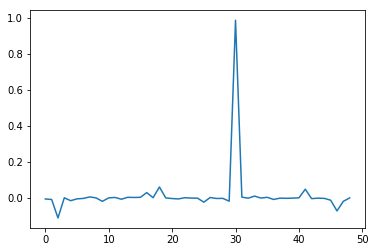

Explained variance: 
 0.008911085610747405


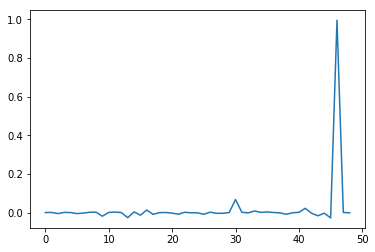

Explained variance: 
 0.00862556077395438


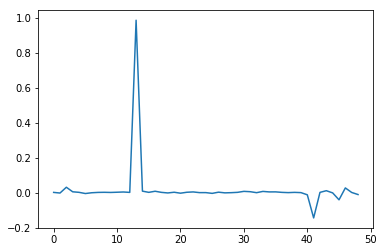

Explained variance: 
 0.00837723640259838


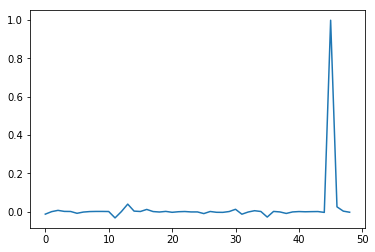

Explained variance: 
 0.007348512784891454


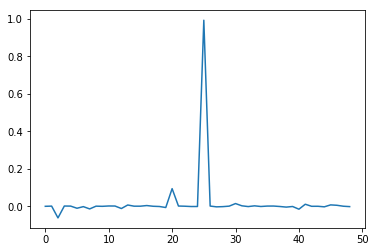

Explained variance: 
 0.006565975965161769


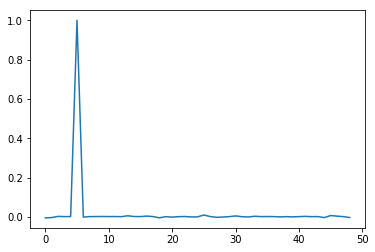

Explained variance: 
 0.005218909755085539


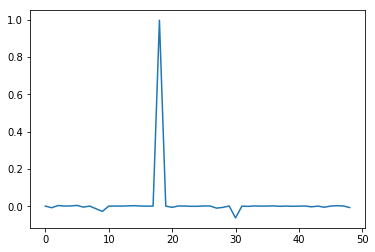

Explained variance: 
 0.0046868255199878466


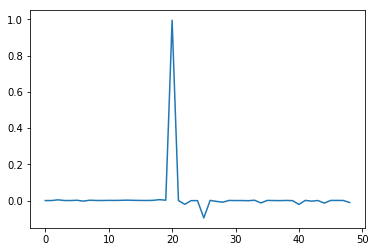

Explained variance: 
 0.004507615396223692


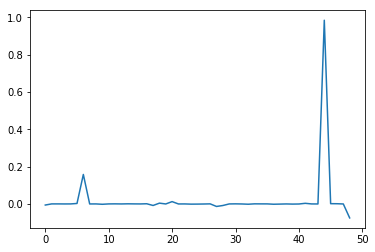

Explained variance: 
 0.004456138562936855


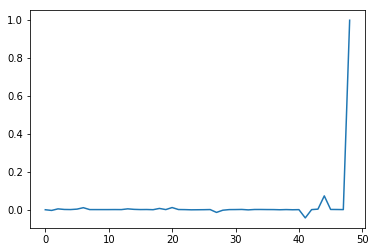

Explained variance: 
 0.004201437201095895


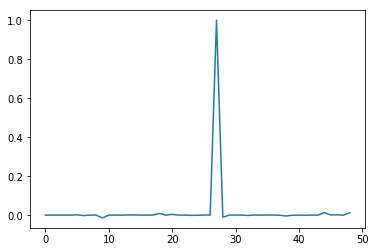

Explained variance: 
 0.0036505624558694893


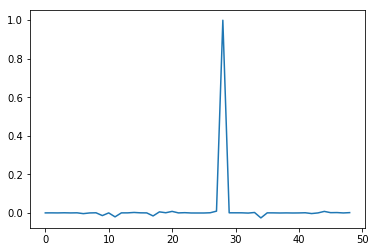

Explained variance: 
 0.0028449174858697925


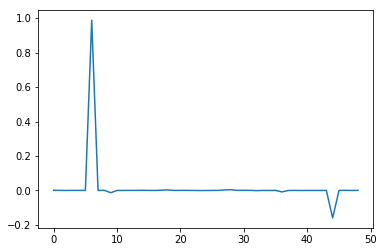

Explained variance: 
 0.002100397111650046


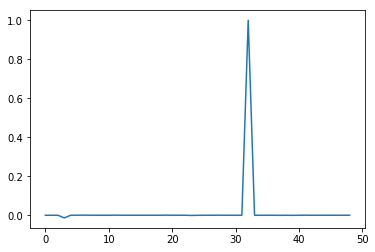

Explained variance: 
 0.0013077010635020704


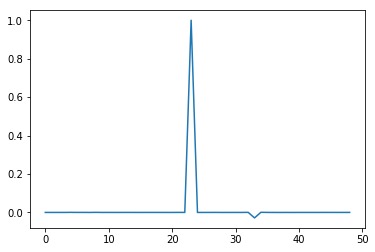

Explained variance: 
 6.236853048193849e-34


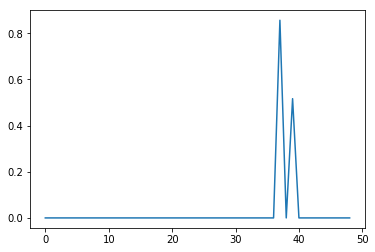

Explained variance: 
 6.236853048193849e-34


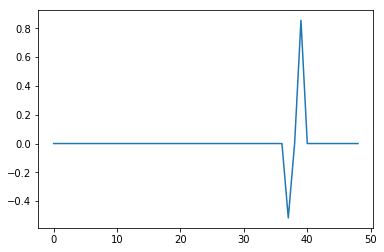

Explained variance: 
 6.236853048192411e-34


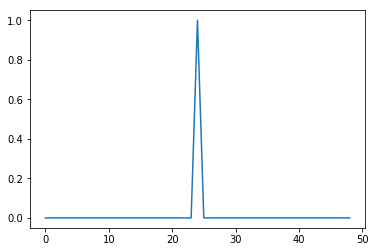

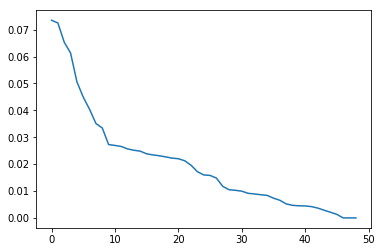

In [18]:
# PCA stuff
from sklearn.decomposition import PCA
valarray = data.drop(["stimulus"], axis=1).values
pca = PCA(n_components=valarray.shape[1])
transformed_array = pca.fit_transform(valarray)
for i in range(valarray.shape[1]):
    print("Explained variance: \n", pca.explained_variance_ratio_[i])
    plt.clf()
    plt.plot(pca.components_[i])
    plt.show()
plt.plot(pca.explained_variance_ratio_)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


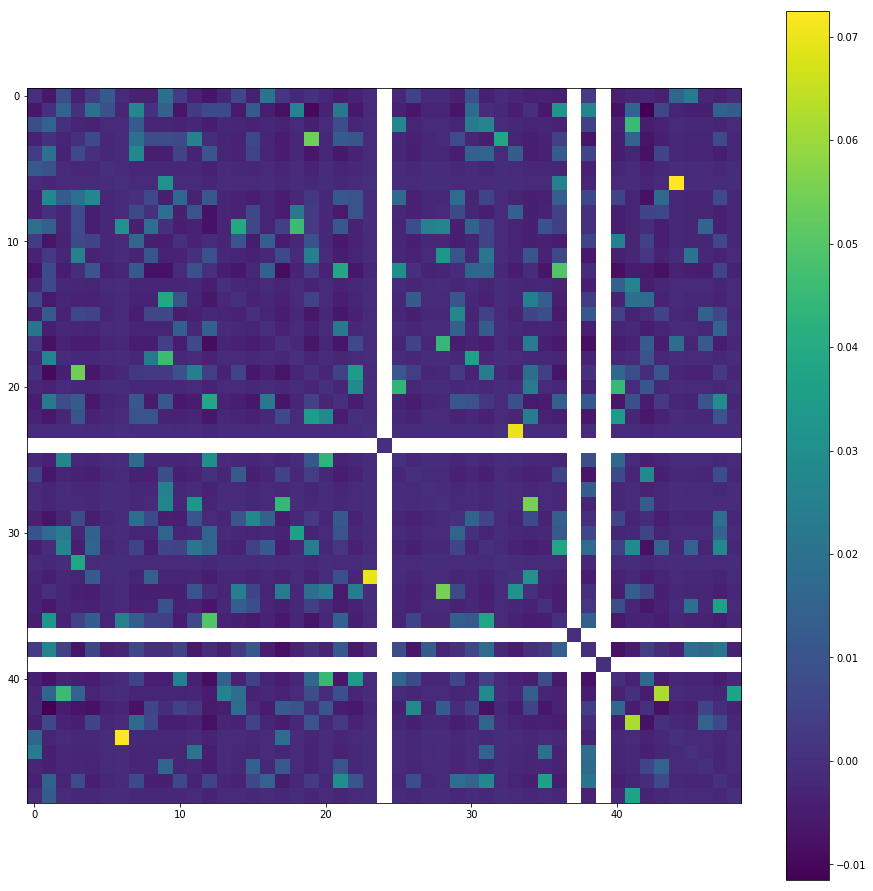

corr: 
 [ 0.         -0.00619195  0.00816879 -0.00370737  0.00336361  0.01238586
 -0.00135556 -0.00390636 -0.00379708  0.01942127  0.00332895 -0.00319599
 -0.00683357 -0.00234913  0.00647475 -0.00411639  0.02089488  0.00178658
 -0.00182823  0.00029709 -0.00173433 -0.00510603 -0.00319599 -0.00091379
         nan -0.0021636   0.00479618 -0.00163506 -0.00152939 -0.00384116
  0.0097792  -0.00415715 -0.00115594 -0.00258674 -0.00377585 -0.00332479
 -0.00463705         nan  0.00292682         nan -0.00413682 -0.00258674
 -0.0021995  -0.00399168  0.01581033  0.02320014 -0.00238452 -0.00377485
 -0.00168542]
pvals: 
 [0.00000000e+00 3.69583198e-01 2.36524268e-01 5.91116809e-01
 6.25970878e-01 7.26787173e-02 8.44275267e-01 5.71356768e-01
 5.82169919e-01 4.88521295e-03 6.29533277e-01 6.43280642e-01
 3.22061027e-01 7.33553928e-01 3.48124171e-01 5.50848765e-01
 2.46091111e-03 7.95723589e-01 7.91070923e-01 9.65662339e-01
 8.01571826e-01 4.59363581e-01 6.43280642e-01 8.94657870e-01
 1.00000000e+00 7.5

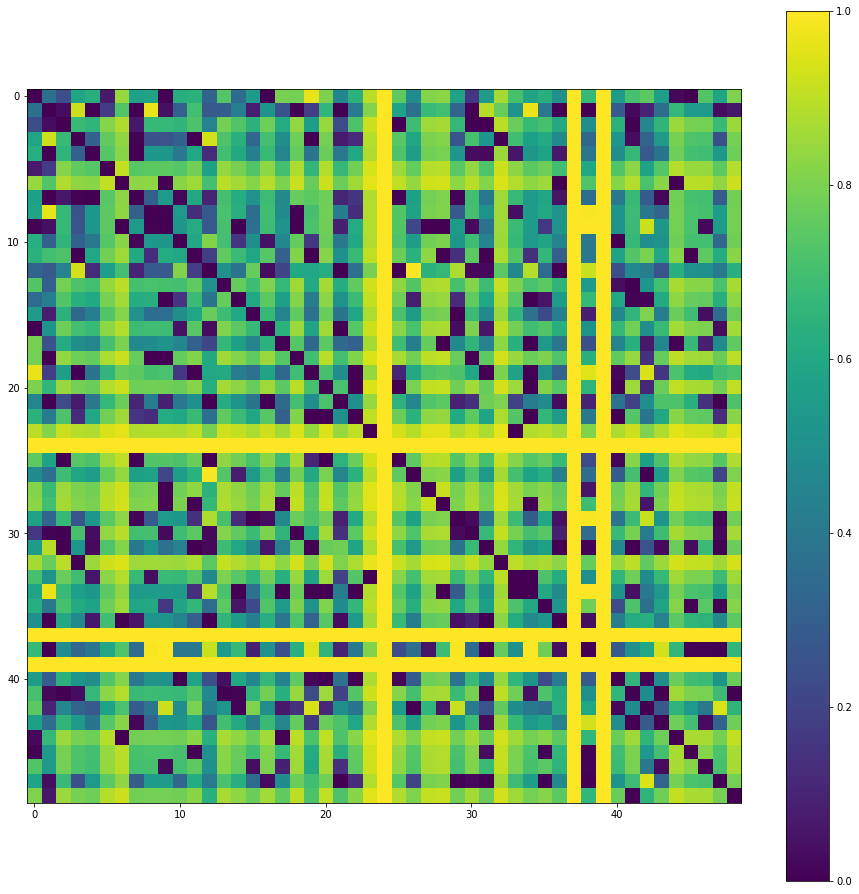

In [19]:
from scipy.stats import pearsonr
corr = np.zeros((len(data.values[0])-1, len(data.values[0])-1))
pval = np.zeros((len(data.values[0])-1, len(data.values[0])-1))
for i in range(len(data.values[0])-1):
    for j in range(len(data.values[0])-1):
        corr[i,j], pval[i,j] = pearsonr(data[str(i+1)], data[str(j+1)])
    corr[i, i] = 0

plt.figure(figsize=(16,16))
plt.imshow(corr)
plt.colorbar()
plt.show()

print("corr: \n", corr[0])
print("pvals: \n", pval[0])
plt.figure(figsize=(16,16))
plt.imshow(pval)
plt.colorbar()
plt.show()

In [96]:
# Collapse per stimulus stuff

stimuli = np.array(data["stimulus"])
new_stim_indices = np.where(stimuli[:-1] != stimuli[1:])[0]
new_stim_indices += np.ones_like(new_stim_indices)
new_stim_indices = np.concatenate([[0], new_stim_indices])
collected_signals = [data.values[np.arange(a, b),:] for (a, b) in zip(new_stim_indices[:-1], new_stim_indices[1:])]
summed_signals = [np.sum(np.array(collected_signals[i]), axis=0) / len(collected_signals[i]) for i in range(len(collected_signals))]
summed_signals = pd.DataFrame(summed_signals)

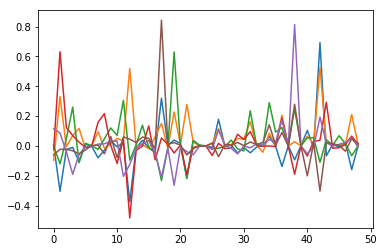

In [200]:
# PCA on summed data
from sklearn.decomposition import PCA
valarray = np.array(summed_signals.drop(len(summed_signals.columns)-1, axis=1).values)
pca = PCA(n_components=valarray.shape[1])
pca.fit(valarray)
lower_dimension_vectors = pca.components_[np.where(pca.explained_variance_ratio_ > 0.05)]
#transformed_data = np.zeros((lower_dimension_vectors.shape[0], len(valarray)))
ld_data = np.dot(lower_dimension_vectors, valarray.transpose()).transpose()
ld_data = pd.DataFrame(ld_data)
ld_data['stimulus'] = summed_signals[len(summed_signals.columns)-1]
[plt.plot(ld) for ld in lower_dimension_vectors]
plt.show()

In [221]:
#Normalization

ld_data_normalized = pd.DataFrame([(ld_data.iloc[:,i] - np.mean(ld_data.iloc[:,i])) / np.std(ld_data.iloc[:,i]) for i in range(ld_data.iloc[:,:-1].shape[1])]).transpose()
ld_data_normalized['stimulus'] = summed_signals[len(summed_signals.columns)-1]

hd_data_normalized = pd.DataFrame([(summed_signals.iloc[:,i] - np.mean(summed_signals.iloc[:,i])) / np.std(summed_signals.iloc[:,i]) for i in range(summed_signals.iloc[:,:-1].shape[1])]).transpose()
hd_data_normalized['stimulus'] = summed_signals[len(summed_signals.columns)-1]

In [295]:
# Decision trees
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

def evaluate_classifier(clf, params, X, y):
    inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    grid_clf = GridSearchCV(estimator=clf, param_grid=params, cv=inner_cv, iid=True)
    generalization_scores = cross_val_score(grid_clf, X=X, y=y, cv=outer_cv)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    test_results = grid_clf.fit(X_train, y_train).predict(X_test)

    print("Generalization scores mean and std: ", generalization_scores.mean(), "+-", generalization_scores.std())
    print("Test results: ")
    print(classification_report(test_results, np.array(y_test)))
    print("predictions and true values:\n", list(zip(test_results, np.array(y_test))))

In [296]:
# Decision trees
X = ld_data_normalized.drop(['stimulus'], axis=1)
y = ld_data_normalized['stimulus']
clf = DecisionTreeClassifier(random_state=0)
params = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"]}
evaluate_classifier(clf, params, X, y)

Generalization scores mean and std:  0.5535714285714286 +- 0.06961995960577833
Test results: 
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        29
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         2
         4.0       0.75      0.75      0.75         4
         5.0       0.40      0.50      0.44         4
         6.0       1.00      0.33      0.50         9
         7.0       0.20      0.33      0.25         3

   micro avg       0.54      0.54      0.54        56
   macro avg       0.39      0.33      0.34        56
weighted avg       0.67      0.54      0.57        56

predictions and true values:
 [(6.0, 6.0), (1.0, 0.0), (0.0, 0.0), (0.0, 7.0), (0.0, 0.0), (4.0, 4.0), (6.0, 2.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (6.0, 2.0), (6.0, 2.0), (5.0, 5.0), (0.0, 3.0), (7.0, 0.0), (0.0, 0.0), (3.0, 5.0), (0.0, 0.

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
